Iniziamo con l'importazione deelle librerie che ci serviranno per leggere il file csv e per fare poi i grafici

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


carichiamo poi il file csv in un dataframe di Pandas per poter leggerne e visualizzare il contenuto

In [2]:
df = pd.read_csv('/content/access_electricity.csv')

In [8]:
df.shape

(242, 10)

In [7]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   242 non-null    object
 1   Country Code   242 non-null    object
 2   Series Name    242 non-null    object
 3   Series Code    242 non-null    object
 4   2012 [YR2012]  242 non-null    object
 5   2013 [YR2013]  242 non-null    object
 6   2014 [YR2014]  242 non-null    object
 7   2015 [YR2015]  242 non-null    object
 8   2016 [YR2016]  242 non-null    object
 9   Continent      228 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
count,242,242,242,242,242,242,242,242,242,228
unique,242,242,1,1,160,159,153,144,122,6
top,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Africa
freq,1,1,242,242,79,82,87,94,119,56


grazie a "df.info()" posso vedere il numero di colonne presenti, il nome e la quantita di righe ,inoltre un dato fondamentale e il dtype ,il quale mi dice i valori all interno delle colonne rispettive e di che tipogia sono .Il comando "df.describe()" genera statistiche descrittive che riassumono la tendenza centrale, la dispersione e la forma della distribuzione di un dataframe, escludendo i valori NaN. Per le colonne numeriche, include conteggio, media, deviazione standard, minimo, massimo e i quartili. Per le colonne di tipo object (come le stringhe), fornisce il conteggio, il numero di valori unici (unique), il valore più frequente (top) e la sua frequenza (freq).



Tutti i tipi di dati sono attualmente object, suggerendo che i valori numerici per gli anni (2012-2016) sono stati importati come stringhe e richiederanno una conversione per l'analisi numerica. La colonna 'Continent' presenta valori mancanti (228 righe su 242)

In [58]:
year_columns = ['2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']
for col in year_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df[year_columns].dtypes)

2012 [YR2012]    float64
2013 [YR2013]    float64
2014 [YR2014]    float64
2015 [YR2015]    float64
2016 [YR2016]    float64
dtype: object


In [10]:
df.describe()

,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
count,240.000000,240.000000,240.000000,239.000000,239.000000
mean,81.184586,81.682020,82.453411,83.022501,83.790258
std,28.704822,28.455565,27.755349,27.301158,26.407400
min,4.912345,5.915033,6.923728,7.252090,7.588477
25%,69.239920,70.639433,76.954431,74.467472,78.572108
50%,98.698935,99.148716,99.217172,99.455063,99.999974
75%,100.000000,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


Dopo aver convertito il tipo di dato delle colonne contenenti gli anni, possiamo finalmente eseguire operazioni numeriche e ottenere molte più informazioni sul contenuto del nostro file CSV.
Ad esempio, possiamo individuare i valori minimi e massimi per ciascun anno (con il valore massimo pari a 100), ed esplorare più a fondo quali paesi o continenti presentano un basso accesso all’elettricità e quali invece hanno raggiunto livelli elevati.

Osservando già la media generale, che risulta essere superiore all’80%, possiamo dedurre che oltre la metà della popolazione mondiale ha accesso all’elettricità, un dato positivo che ci permette di concentrare l’attenzione sull’implementazione del restante 20% ancora privo di accesso.

In [12]:
 # le prime 10 righe del dataset per avere una panoramica iniziale dei dati
prime_10_righe_tutte_colonne = df.iloc[:10, :]
print("\nPrime 10 righe con tutte le colonne:")
print(prime_10_righe_tutte_colonne[['Country Name', '2012 [YR2012]', '2016 [YR2016]', 'Continent']])


Prime 10 righe con tutte le colonne:
          Country Name  2012 [YR2012]  2016 [YR2016]      Continent
0          Afghanistan      69.100000      84.137138           Asia
1              Albania     100.000000     100.000000         Europe
2              Algeria      98.764660      99.439568         Africa
3       American Samoa            NaN            NaN        Oceania
4              Andorra     100.000000     100.000000         Europe
5               Angola      35.821964      40.520607         Africa
6  Antigua and Barbuda      95.254692      97.354668  North America
7           Arab World      87.288244      88.768654           Asia
8            Argentina      99.584412     100.000000  South America
9              Armenia      99.878876     100.000000           Asia


In [14]:
# le ultime 10 righe del dataset

ultime_10_righe_tutte_colonne = df.iloc[-10:, :]
print("\nUltime 10 righe con tutte le colonne:")
print(ultime_10_righe_tutte_colonne[['Country Name', '2012 [YR2012]', '2016 [YR2016]', 'Continent']])


Ultime 10 righe con tutte le colonne:
              Country Name  2012 [YR2012]  2016 [YR2016]      Continent
232             Uzbekistan      99.999908     100.000000           Asia
233                Vanuatu      39.982830      57.820000        Oceania
234          Venezuela, RB      99.044968      99.603836  South America
235                Vietnam     100.000000     100.000000           Asia
236  Virgin Islands (U.S.)     100.000000     100.000000  North America
237     West Bank and Gaza     100.000000     100.000000           Asia
238                  World      85.069100      87.378443            NaN
239            Yemen, Rep.      65.942101      71.642349           Asia
240                 Zambia      24.894667      27.219337         Africa
241               Zimbabwe      36.728878      38.145138         Africa


Abbiamo iniziato l’esplorazione del nostro file visualizzando le prime 10 righe del dataset access_electricity.
Si può notare subito che i dati sono ordinati alfabeticamente in base alla colonna “Country Name”.
Ho voluto analizzare il cambiamento dei valori tra il 2012 e il 2016, e da questa prima osservazione emerge un incremento dell’accesso all’elettricità per la maggior parte dei primi 10 Paesi.

Inoltre, si osserva che l’Oceania presenta valori nulli, indicando la mancanza di dati disponibili per questa regione.
Esaminando anche le ultime 10 righe del file CSV, si confermano in parte le osservazioni precedenti. Tuttavia, è interessante notare che alla posizione 238, nella colonna “Country Name”, non è presente il nome di un Paese, bensì la voce “World”, che non ha alcun valore associato nella colonna “Continent”.

Questo suggerisce che si tratta di un campo rappresentante i valori totali globali di access_electricity, che risultano essere 85.069100 nel 2012 e 87.378443 nel 2016.
Ciò conferma che, a livello mondiale, c’è stato un incremento dell’accesso all’elettricità, rafforzando ulteriormente le ipotesi già emerse nelle analisi precedenti.

In [21]:
#  paesi (di tutti i continenti) con un basso accesso all'elettricità nel 2012, per evidenziare le aree del mondo che potrebbero beneficiare di progetti di sviluppo o aiuti umanitari.
basso_accesso_2012 = df.loc[df['2012 [YR2012]'] < 20]
print("\nPaesi con meno del 20% di accesso all'elettricità nel 2012:")
print(basso_accesso_2012[['Country Name', 'Continent', '2012 [YR2012]']].head(20))



Paesi con meno del 20% di accesso all'elettricità nel 2012 (tutti i continenti):
                 Country Name Continent  2012 [YR2012]
31               Burkina Faso    Africa      16.399708
32                    Burundi    Africa       6.500000
38   Central African Republic    Africa      11.595876
39                       Chad    Africa       7.069442
45           Congo, Dem. Rep.    Africa      15.400000
89              Guinea-Bissau    Africa      12.064826
124                   Liberia    Africa       8.599684
134                Madagascar    Africa      17.732237
135                    Malawi    Africa       7.400000
153                Mozambique    Africa      19.543192
162                     Niger    Africa      14.400000
172          Papua New Guinea   Oceania      19.972792
182                    Rwanda    Africa      16.069777
190              Sierra Leone    Africa      15.174726
199               South Sudan    Africa       4.912345
214                  Tanzania    Afric

In [25]:
#Identificare i paesi (di tutti i continenti) con un basso accesso all'elettricità nel 2016,
basso_accesso_2016 = df.loc[df['2016 [YR2016]'] < 20]
print("\nPaesi con meno del 20% di accesso all'elettricità nel 2016:")
print(basso_accesso_2016[['Country Name', 'Continent', '2016 [YR2016]']].head(20))



Paesi con meno del 20% di accesso all'elettricità nel 2016 (tutti i continenti):
                 Country Name Continent  2016 [YR2016]
31               Burkina Faso    Africa      19.164713
32                    Burundi    Africa       7.588477
38   Central African Republic    Africa      13.985112
39                       Chad    Africa       8.830898
45           Congo, Dem. Rep.    Africa      17.147379
89              Guinea-Bissau    Africa      14.655790
124                   Liberia    Africa      19.800000
135                    Malawi    Africa      11.000000
162                     Niger    Africa      16.217234
199               South Sudan    Africa       8.947628


Successivamente, ho deciso di approfondire l’analisi dei Paesi che, negli anni 2012 e 2016, presentavano un valore di access_electricity inferiore a 20.
Ho richiesto la visualizzazione dei primi 20 Paesi, ma, contando effettivamente quelli rappresentati, ne risultano 17.

Questo significa che nel 2012 soltanto 17 Paesi avevano un basso livello di accesso all’elettricità, mentre nel 2016, grazie all’aumento complessivo dell’accesso, il numero è diminuito ulteriormente, scendendo a 10 Paesi.

Un altro aspetto evidente è che, in entrambe le rappresentazioni, il continente con il minor accesso all’elettricità è l’Africa.
Tuttavia, potremmo ordinare i dati in modo più preciso per identificare eventuali ulteriori informazioni specifiche, come quali regioni o Paesi hanno mostrato i maggiori progressi o, al contrario, i ritardi più significativi.

In [59]:
df_desc = df.sort_values(by='2012 [YR2012]', ascending=True)

print("Paesi con il minor accesso all'elettricità nel 2012 E 2016 :")
print(df_desc[['Country Name', '2012 [YR2012]','2016 [YR2016]','Continent']].head(10))

Paesi con il minor accesso all'elettricità nel 2012 E 2016 (primi 10):
                 Country Name  2012 [YR2012]  2016 [YR2016] Continent
199               South Sudan       4.912345       8.947628    Africa
32                    Burundi       6.500000       7.588477    Africa
39                       Chad       7.069442       8.830898    Africa
135                    Malawi       7.400000      11.000000    Africa
124                   Liberia       8.599684      19.800000    Africa
38   Central African Republic      11.595876      13.985112    Africa
89              Guinea-Bissau      12.064826      14.655790    Africa
162                     Niger      14.400000      16.217234    Africa
190              Sierra Leone      15.174726      20.300000    Africa
214                  Tanzania      15.300000      32.800000    Africa


Quello che abbiamo fatto è stato selezionare i Paesi con il minor accesso all’elettricità, posizionati nella parte alta della rappresentazione, e metterli a confronto tra gli anni analizzati.
Da questo confronto si può osservare un aumento generale dei valori in tutti i Paesi considerati.

Inoltre, prestando attenzione al grafico, si nota che la Tanzania ha registrato una crescita significativa, superando la soglia di 20 fissata nelle analisi precedenti.
Questo conferma la sua uscita dalla classifica dei primi 20 Paesi con il minore accesso all’elettricità nel 2016.

A questo punto, possiamo invece chiederci: quali sono i Paesi che si trovano nella top 10 per accesso all’elettricità?

In [60]:
df_asc = df.sort_values(by='2012 [YR2012]', ascending=False)

print("Paesi con il maggior accesso all'elettricità nel 2012 E 2016 :")
print(df_asc[['Country Name', '2012 [YR2012]','2016 [YR2016]','Continent']].head(10))

Paesi con il maggior accesso all'elettricità nel 2012 E 2016 (primi 10):
       Country Name  2012 [YR2012]  2016 [YR2016]      Continent
1           Albania          100.0          100.0         Europe
4           Andorra          100.0          100.0         Europe
11        Australia          100.0          100.0        Oceania
12          Austria          100.0          100.0         Europe
15          Bahrain          100.0          100.0           Asia
19          Belgium          100.0          100.0         Europe
40  Channel Islands          100.0          100.0         Europe
49          Croatia          100.0          100.0         Europe
37   Cayman Islands          100.0          100.0  North America
36           Canada          100.0          100.0  North America


In questa fase, abbiamo analizzato i Paesi con il maggior accesso all’elettricità, osservando che già nel 2012 questi Paesi presentavano un livello di accesso completo.
Confrontandoli con i dati del 2016, abbiamo voluto verificare se nel tempo si fosse verificato un eventuale calo, cosa che non è avvenuta.

Ciò che emerge chiaramente è che, nella top 10 dei Paesi con il più alto accesso all’elettricità, l’Europa occupa le prime posizioni, confermando l’elevato livello di sviluppo e infrastruttura elettrica del continente.

In [30]:
import numpy as np

def calculate_percentage_variation(row):
    value_2012 = row['2012 [YR2012]']
    value_2016 = row['2016 [YR2016]']

    if pd.isna(value_2012) or pd.isna(value_2016) or value_2012 == 0:
        return np.nan
    else:
        return ((value_2016 - value_2012) / value_2012) * 100

df['Variazione % 2012-2016'] = df.apply(calculate_percentage_variation, axis=1)


print("Prime righe e del DF con la nuova colonna:")
print(df[['Country Name', '2012 [YR2012]', '2016 [YR2016]', 'Variazione Percentuale 2012-2016']].head())

Prime righe del DataFrame con la nuova colonna:
     Country Name  2012 [YR2012]  2016 [YR2016]  \
0     Afghanistan       69.10000      84.137138   
1         Albania      100.00000     100.000000   
2         Algeria       98.76466      99.439568   
3  American Samoa            NaN            NaN   
4         Andorra      100.00000     100.000000   

   Variazione Percentuale 2012-2016  
0                         21.761416  
1                          0.000000  
2                          0.683349  
3                               NaN  
4                          0.000000  


In [31]:
df.shape

(242, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country Name                      242 non-null    object 
 1   Country Code                      242 non-null    object 
 2   Series Name                       242 non-null    object 
 3   Series Code                       242 non-null    object 
 4   2012 [YR2012]                     240 non-null    float64
 5   2013 [YR2013]                     240 non-null    float64
 6   2014 [YR2014]                     240 non-null    float64
 7   2015 [YR2015]                     239 non-null    float64
 8   2016 [YR2016]                     239 non-null    float64
 9   Continent                         228 non-null    object 
 10  Variazione Percentuale 2012-2016  239 non-null    float64
 11  Variazione % 2012-2016            239 non-null    float64
dtypes: float

La creazione della variazione percentuale tra il 2012 e il 2016 ci permette di individuare un trend di crescita o diminuzione dell’accesso all’elettricità.
Questa informazione, rappresentata graficamente, risulta molto più intuitiva da interpretare e consente di effettuare analisi previsionali sul futuro andamento dei dati.
Per questo motivo, abbiamo deciso di aggiungere una nuova colonna al dataset contenente questa variazione percentuale.

## Bar Plot della Variazione Media per Continente

 un grafico a barre  per mostrare la variazione percentuale media dell'accesso all'elettricità tra il 2012 e il 2016 per ogni continente. Questo evidenzierà quali continenti hanno registrato la crescita maggiore o minore.


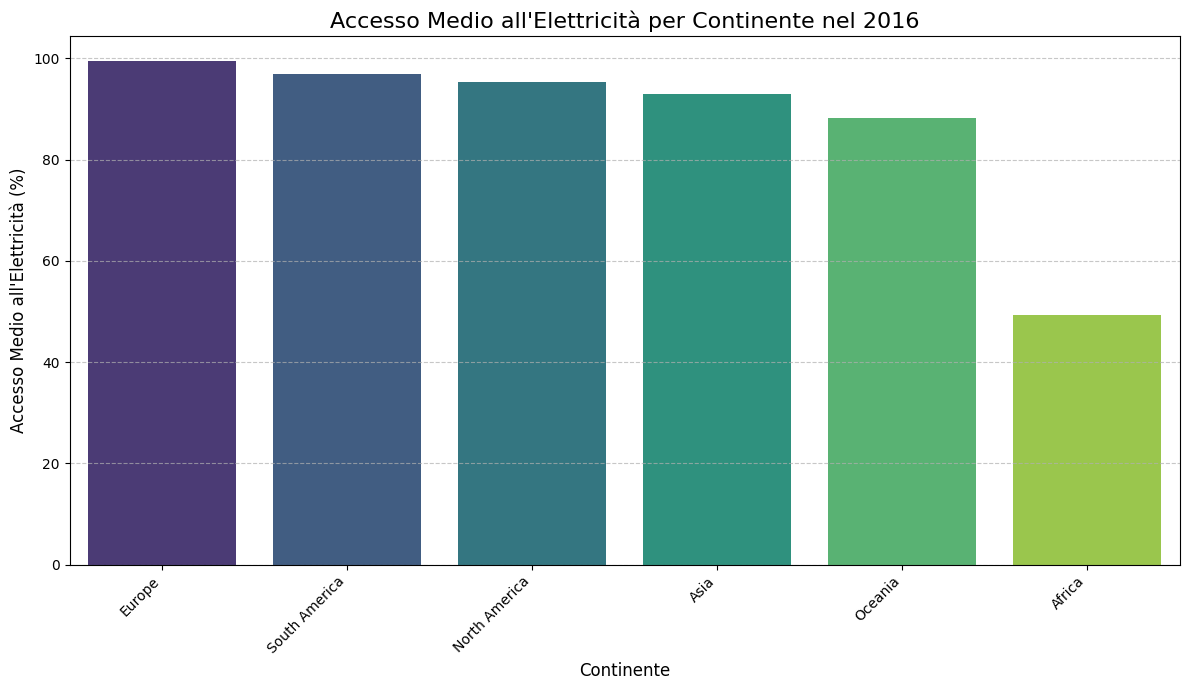

In [54]:
df_avg_access_2016 = df.groupby('Continent')['2016 [YR2016]'].mean().dropna().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=df_avg_access_2016.index, y=df_avg_access_2016.values, hue=df_avg_access_2016.index, palette='viridis', legend=False)
plt.title('Accesso Medio all\'Elettricità per Continente nel 2016', fontsize=16)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Accesso Medio all\'Elettricità (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In sintesi, il grafico dimostra che le regioni con un accesso storicamente più limitato, come l'Africa, hanno mostrato la crescita più dinamica nel periodo considerato, mentre i continenti già altamente elettrificati hanno mantenuto uno status quo.

## Boxplot Continenti a confronto (2016)


 stiamo usando il boxplot  per visualizzare la distribuzione dell'accesso all'elettricità nel 2016 per ciascun continente.  ho scelto questa rappresentazione perche il boxplot mostrerà la mediana, i quartili e gli outlier, fornendo una panoramica comparativa di diversi aspetti in un solo grafico.


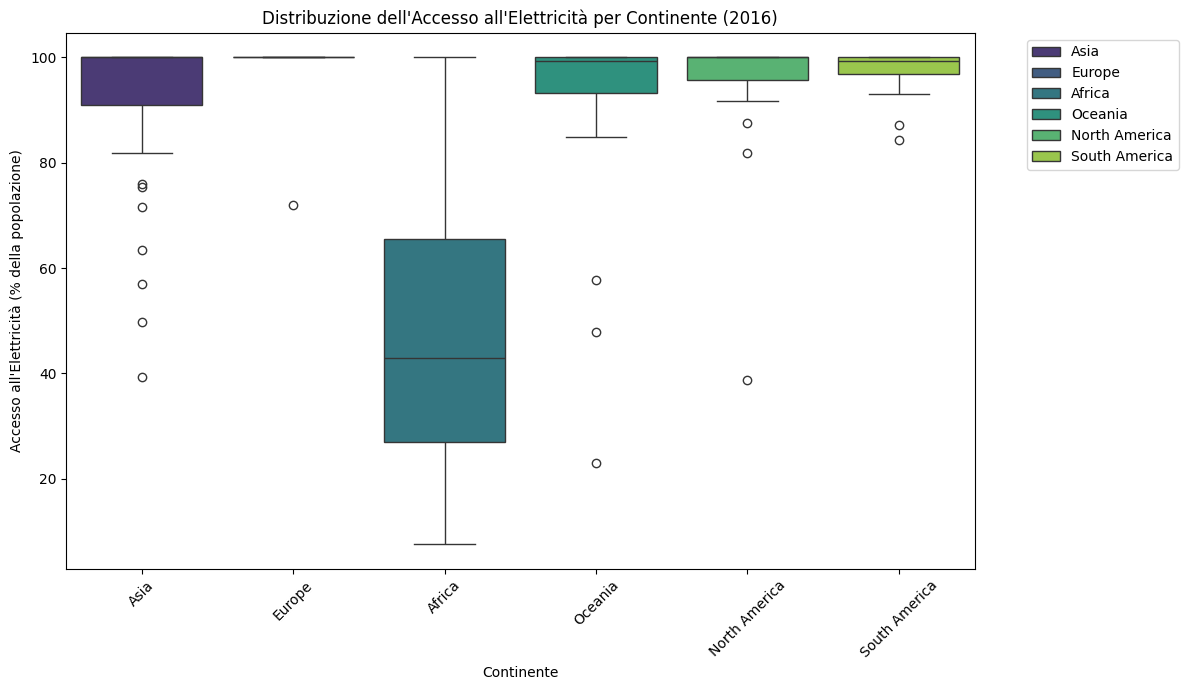

In [55]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Continent', y='2016 [YR2016]', data=df, hue='Continent', palette='viridis')
plt.title("Distribuzione dell'Accesso all'Elettricità per Continente (2016)")
plt.xlabel('Continente')
plt.ylabel('Accesso all\'Elettricità (% della popolazione)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ho notato che in europa e presente un singolo outlier e ho provato ad apprfoondire per vedere quale paese corrispondesse

In [61]:
europe_df = df[df['Continent'] == 'Europe']
q1 = europe_df['2016 [YR2016]'].quantile(0.25)
q3 = europe_df['2016 [YR2016]'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_europe = europe_df[(europe_df['2016 [YR2016]'] < lower_bound) | (europe_df['2016 [YR2016]'] > upper_bound)]

print("Paesi outlier in Europa per l'accesso all'elettricità nel 2016:")
if not outliers_europe.empty:
    display(outliers_europe[['Country Name', '2016 [YR2016]']])
else:
    print("Nessun outlier identificato in Europa per l'accesso all'elettricità nel 2016 secondo la regola IQR.")

Paesi outlier in Europa per l'accesso all'elettricità nel 2016:


,Country Name,2016 [YR2016]
204,St. Martin (French part),71.970284




**In generale:** il boxplot evidenzia la marcata disuguaglianza globale nell'accesso all'elettricità, con l'Africa che si confronta con le maggiori sfide, mentre Europa e Nord America hanno raggiunto livelli di accesso quasi universali.questo rappresenta bene quello che avevamo visto nella fase esplrativa del dataframe.

**Europa e nord america :**
Per questi continenti, le scatole sono molto piccole e posizionate quasi al 100%. Questo significa che quasi tutti i paesi in queste regioni hanno un accesso all'elettricità universale o quasi.

**L'Oceania:** ha una mediana alta, ma il boxplot è più allungato e ha un numero maggiore di outlier in basso. Questo suggerisce che, pur avendo molti paesi con accesso elevato (exe: Australia), ci sono anche diversi paesi con un accesso significativamente più basso(exe isole).

**Sud America e Asia:** Questi continenti mostrano scatole più ampie rispetto a Europa e Nord America, ma comunque posizionate verso l'alto; Ciò indica che l'accesso all'elettricità è generalmente molto alto, ma c'è una maggiore variabilità tra i paesi rispetto all'Europa o al Nord America.

**Africa:**
Il boxplot per l'Africa è quello più esteso verso il basso e ha la mediana più bassa (intorno al 40-50%). La scatola è molto più lunga , indicando un'enorme disparità nell'accesso all'elettricità.
Molti paesi africani hanno un accesso estremamente limitato, mentre altri sono in una situazione leggermente migliore, ma non raggiungono i livelli di accesso degli altri continenti

## Istogramma della Variazione Percentuale (2012-2016)
 un istogramma utilizzando Matplotlib per visualizzare la distribuzione della variazione percentuale dell'accesso all'elettricità tra il 2012 e il 2016.


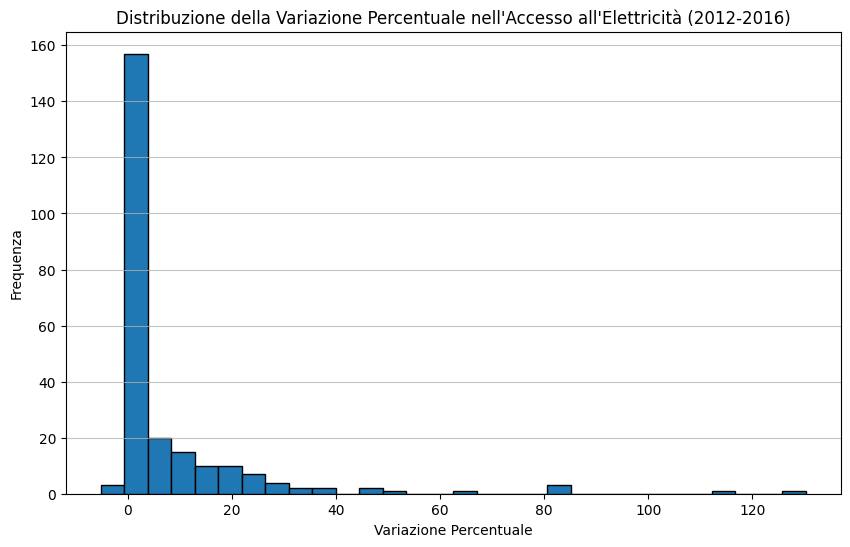

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['Variazione % 2012-2016'].dropna(), bins=30, edgecolor='black')
plt.title("Distribuzione della Variazione Percentuale nell'Accesso all'Elettricità (2012-2016)")
plt.xlabel('Variazione Percentuale')
plt.ylabel('Frequenza')
plt.grid(axis='y', alpha=0.75)
plt.show()

prima di andare ad analizzare cosa ci dice il grafico ,cerchiamo di capirlo : le barre blu all'interno dell'istogramma rappresentano il numero di paesi che rientrano in un certo intervallo di variazione percentuale ,piu una barra e alta piu paesi si trovano all'interno di quel range ,se una barra invece e bassa significa che pochi paesi hanno avuto una variazione in quell intervallo; e questo ci torna perche se andiamo ad indagare possiamo vedere che ce un picco vicino allo zero perche un gran numero di paesi ha avuto una variazione percentuale molto vicina allo 0 (quindi l'accesso e rimasto uguale) ;attenzione perche avevamo visto che gia nel 2012 erano presenti paesi che avevano raggiunto il 100% di accesso e la sua variazione sara dello 0% e ricadra nella zona  vicino allo 0 ;ma non solo,nell'istogramma sono anche presenti i paesi che hanno avuto una variazione mooolto piccola durante i quattro anni.

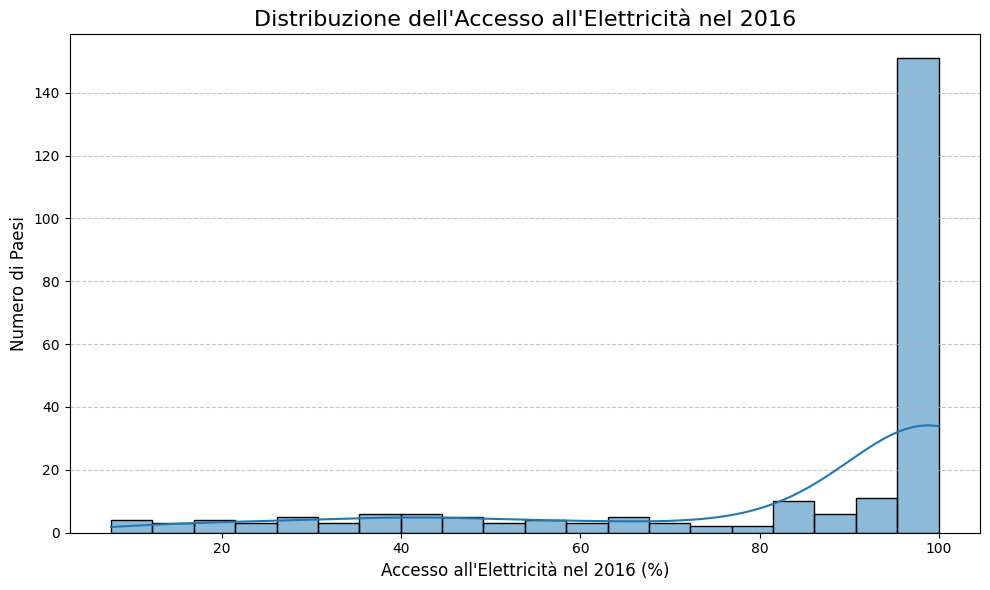

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['2016 [YR2016]'].dropna(), bins=20, kde=True)
plt.title('Distribuzione dell\'Accesso all\'Elettricità nel 2016', fontsize=16)
plt.xlabel('Accesso all\'Elettricità nel 2016 (%)', fontsize=12)
plt.ylabel('Numero di Paesi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

il grafico e composto sull asse x dalla % di accesso all'elettricita nel 2016 e sull asse delle y dal numero di paesi ,possiamo percio andare a vedere il quantitativo di paesi in relazione alla %di accesso all'eletriccita e quello che vediamo per prima cosa e una barra molto alta sulla sx in corrispondenza del 100%,questo ci dice che un numero molto elevato di paesi ha raggiunto un accesso quasi universale ,ma anche se ce la presenza di un numero elevato di paesi con un accessibilita elevata si possono vedere altri paesi con livelli di accesso inferiori,fortunatamente piu si va verso lo 0 e piu la quantita di paesi diminuisce. percio possiamo vedere la situazione globale dei paesi .

## Scatterplot Accesso Elettricità (2012 vs 2016)

 uno scatterplot per mostrare la relazione tra l'accesso all'elettricità nel 2012 e nel 2016. Questo grafico aiuterà a identificare i paesi che hanno avuto i maggiori cambiamenti.


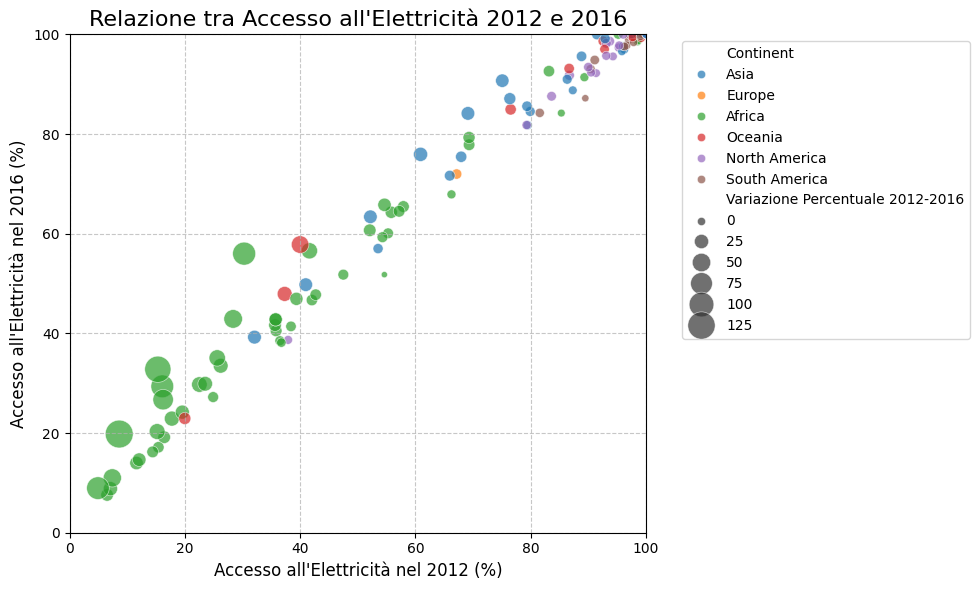

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2012 [YR2012]', y='2016 [YR2016]', data=df, hue='Continent', size='Variazione Percentuale 2012-2016', sizes=(20, 400), alpha=0.7)
plt.title('Relazione tra Accesso all\'Elettricità 2012 e 2016', fontsize=16)
plt.xlabel('Accesso all\'Elettricità nel 2012 (%)', fontsize=12)
plt.ylabel('Accesso all\'Elettricità nel 2016 (%)', fontsize=12)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 il grafico mostra una chiara tendenza globale verso l'aumento dell'accesso all'elettricità, con molti paesi che hanno mantenuto livelli elevati e altri che hanno fatto passi da gigante per migliorare la situazione. I colori ci aiutano a contestualizzare questi cambiamenti per i diversi continenti.

#conclusione:

L'analisi dell'accesso all'elettricità tra il 2012 e il 2016 ha rivelato una chiara tendenza globale verso un miglioramento, con la maggior parte dei paesi che ha registrato un aumento o mantenuto alti livelli. È emersa una marcata disparità tra i continenti: l'Europa e il Nord America mostrano un accesso quasi universale e stabile, mentre l'Africa, pur partendo da livelli inferiori, ha registrato la crescita percentuale media più significativa, indicando un forte progresso. Altri continenti come l'Asia e il Sud America presentano un accesso generalmente elevato ma con una maggiore variabilità interna. I boxplot e gli istogrammi hanno evidenziato la concentrazione di paesi con accesso elevato e l'importanza delle variazioni positive, mentre lo scatterplot ha visualizzato le traiettorie individuali dei paesi, distinguendo chi ha mantenuto lo status quo da chi ha compiuto notevoli passi avanti.

Per futuri sviluppi, sarebbe interessante approfondire le ragioni dietro la rapida crescita in alcuni paesi africani e le strategie adottate, per identificarne le best practice replicabili. Si potrebbe inoltre integrare il dataset con fattori socio-economici (es. PIL pro capite, politiche energetiche, investimenti) per capire meglio le correlazioni e le cause sottostanti ai modelli di accesso all'elettricità. L'espansione dell'analisi a un periodo temporale più lungo permetterebbe di valutare tendenze a lungo termine e prevedere scenari futuri, nonché di identificare i paesi che, nonostante i progressi globali, rimangono indietro e necessitano di interventi mirati. Infine, un'analisi più granulare all'interno dei continenti (es. per regioni o sottocontinenti) potrebbe rivelare sfumature e bisogni specifici.

